# <center>Decision Tree 决策树</center>
使用概率测量方法处理分类问题


分类系统：
* decision block 判断模块    长方形
* terminating block  终止模块  得出的结论  椭圆
* branch 分支  左右箭头
![1.png](1.png)
（专家系统）

决策树的原理： __通过推断分解，逐步缩小待猜测实物的范围。__

决策树的一个重要任务是为了理解数据中所蕴含的知识信息。
 
* 优势：计算复杂度不高，输出结果易于理解，对中间值得缺失不敏感，可以处理不相关特征数据
* 缺点：可能会产生过度匹配的问题
* 适用数据类型：数值型和标称型



##  3.1 决策树的构造

##   信息论划分数据集
### 问题1：当前数据集的哪些特征在划分数据类型起决定性作用？
     方法：评估每个特征
     

### 3.1.1 信息增益
__含义：在划分数据集之间之后信息发生的变化称为*信息增益*__

__The change in information before and after the split is known as the *information gain*.__

获得信息增益最高的特征就是最好的选择。

#### 计算信息增益
集合信息的度量方式称为__香农熵__ 或者简称为 __熵__  (信息论之父劳克德.香农)
* 熵 entrop 

  定义：信息的期望
  __信息__：

如果待分类的事务可能划分在多个分类之中，则符号$x_i$的信息定义为:
    $$ l(x_i) = -\log_{2}{p(x_i)} $$
其中$p(x_i)$是该选择分类的概率

所有类别所有可能值包含的信息期望值：$$p(x_i) =\frac{x_i}{n}$$

## 熵的计算公式：

$$ H = -\sum_{i=1}^{n}{p(x_i)\log_{2}{p(x_i)}}$$
n为分类的数目

### 计算香农熵代码：

In [ ]:
from math import log

def calcShannonEnt(dataSet):
    numEntries = len(dataSet)  计算数据中实例的总数
    labelCounts = {}   创建一个数据字典，它的键值是最后一列的数值
    1.为所有可能分类创建字典。
    for featVec in dataSet:           dataSet 多维数组        #the the number of unique elements and their occurance
        currentLabel = featVec[-1]         每次取一行数组
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        如果 currentLabel该数据的标签 不在 labelCounts中 则 labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1       给labelCounts字典 记录currentLabel数据标签  的 值
        
        以上步骤是为了统计标签的格式来方便计算概率
        
    shannonEnt = 0.0   香农熵float类型
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries     计算概率。
        shannonEnt -= prob * log(prob,2)         利用香农公式求解信息熵    #log base 2  以2为底求对数
    return shannonEnt

In [1]:
import trees

```  
创建数据
def createDataSet():  
    dataSet = [[1, 1, 'yes'],            dataSet的类型：数组
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    #change to discrete values
    return dataSet, labels
```

In [2]:
myDat,labels = trees.createDataSet()

In [3]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [4]:
trees.calcShannonEnt(myDat) #计算香农熵

0.9709505944546686

__信息熵越高，则混合的数据越多__

In [5]:
myDat[0][-1] = 'maybe' #二维数组嘛~~

In [6]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [7]:
trees.calcShannonEnt(myDat)

1.3709505944546687

In [8]:
myDat[0][-1] = 'no'
myDat[1][-1] = 'no'

In [9]:
myDat

[[1, 1, 'no'], [1, 1, 'no'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [10]:
trees.calcShannonEnt(myDat)  

0.0

__以上实验可以看出，当数据中不存在异类时，信息熵为0（即数据的混乱度无零）__

### 3.1.2 划分数据集

* 信息增益 information gain 熵的减少或者数据无序度的减少

### 数据划分思路：对每个特征划分数据集的结果计算一次信息熵，然后判断按照哪个特征划分数据是最好的划分方法。

#### 3-2 按照给定特征划分数据集

In [ ]:
def splitDataSet(dataSet, axis, value):   参数： dataSet待划分的数据集  axis 划分数据的特征（索引）  
                                  value需要返回的特征的值（需要划分数据的特征值）
    retDataSet = []
    for featVec in dataSet:       featVec 是 dataSet 的一列数据
        if featVec[axis] == value:
        
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            
            reducedFeatVec 等于 剔除axis属性的featVec
            
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [11]:
myDat,labeks = trees.createDataSet()

In [12]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [13]:
trees.splitDataSet(myDat,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [14]:
trees.splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

#### 3-3 选择最好的数据划分方式
循环计算香农熵和splitDataSet()函数，找到最好的特征划分方式。

__熵计算__将会告诉我们如何划分__数据集是最好的数据组织方式__

In [ ]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels 数据集的特征长度  不包括最后一项标签label
    baseEntropy = calcShannonEnt(dataSet)  计算原始香农熵
    bestInfoGain = 0.0 最好的香农熵; bestFeature = -1 最好的划分特征
    for i in range(numFeatures):        #iterate over all the features 迭代所有的属性
        featList = [example[i] for example in dataSet]   #create a list of all the examples of this feature
        将数据集所有第i个特征值或者所有可能存在的值写入这个新的list中
        uniqueVals = set(featList)       #get a set of unique values 获取集合
        newEntropy = 0.0 新的香农熵
        for value in uniqueVals:  #特征 当中的 值（多个）
            subDataSet = splitDataSet(dataSet, i, value)  来分离数据/dataSet 第i个属性 等于 value的数据挑出来
            prob = len(subDataSet)/float(len(dataSet)) 概率，所占比例
            newEntropy += prob * calcShannonEnt(subDataSet) 香农熵叠加     
        infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy 信息增益
        
        
        if (infoGain > bestInfoGain):       #compare this to the best gain so far
            bestInfoGain = infoGain         #if better than current best, set to best
            bestFeature = i
    return bestFeature    

In [15]:
mayDat,labels = trees.createDataSet()

In [16]:
trees.chooseBestFeatureToSplit(myDat)

0

0的含义是 数据集按照第一个特征属性进行划分。也就是说第一个特征是1的放在一组，第一个特征是0的放在一组。

In [17]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

### 3.1.3 递归构建决策树

工作原理：得到原始数据集，然后基于最好的属性划分进行数据分类。第一次划分完之后，数据将被向下传递到树的分支的下一个节点。在这个节点上，我们可以再次划分数据。采用递归的方法。

递归结束条件：程序遍历完所有划分数据的属性。或者每个分支下的所有势力都具有相同的分类。

如果属性都使用完了：但标签还不唯一，就采用__多数表决__的方法决定该叶子节点的分类。

In [ ]:
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    把classCount 字典类型 {key：value} 进行reverse=True升序排序 ,比较的关键字是第二个key=operator.itemgetter(1)
    return sortedClassCount[0][0]

#### 3-4 创建树的函数代码

In [ ]:
def createTree(dataSet,labels):   dataSet 数据集   labels 标签集
    classList = [example[-1] for example in dataSet]  数据集的所有标签。
    
    if classList.count(classList[0]) == len(classList):  递归停止的第一个条件:所有的类标签完全相同，则直接返回该类的标签。
        return classList[0]#stop splitting when all of the classes are equal
        
    if len(dataSet[0]) == 1: #stop splitting when there are no more features in dataSet 递归停止的第二个条件：用完了所有特征、任然不能将数据
        return majorityCnt(classList)                                                集划分成仅包含唯一类别的分组。
                                                                           挑出出现次数最多的类别作为返回                                                                            值。
    bestFeat = chooseBestFeatureToSplit(dataSet)  最好的数据划分 返回值为索引。
    bestFeatLabel = labels[bestFeat]  选出最好的数据划分的属性。
    
    myTree = {bestFeatLabel:{}} 构建树
    
    del(labels[bestFeat]) 删除变量 选择的最好的数据划分的属性 ==》labels 少了变量
    
    featValues = [example[bestFeat] for example in dataSet]          bestFeat是索引值。
    uniqueVals = set(featValues)  获取划分后的集合
    
    这几句的作用是 splitDataSet(dataSet, bestFeat, value)分割
    
    for value in uniqueVals:
        subLabels = labels[:]       #copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(  splitDataSet(dataSet, bestFeat, value) ,subLabels)    迭代建树 一个出发点 
                好多分支                                                            去 好多个节点。
    return myTree 

In [18]:
myDat,labels = trees.createDataSet()

In [19]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [20]:
labels

['no surfacing', 'flippers']

In [21]:
myTree = trees.createTree(myDat,labels)

In [23]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 3.2Matplotlib注解绘制树形图形

In [23]:
# encoding=utf8 
import matplotlib
import matplotlib.pyplot as plt

from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] 

#定义文本框和箭头格式
decisionNode = dict(boxstyle="sawtooth", fc="0.8")  文本框
leafNode = dict(boxstyle="round4", fc="0.8")  文本框
arrow_args = dict(arrowstyle="<-") 箭头

#绘制带箭头的注解
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )

#
def createPlot():
    fig = plt.figure(1, facecolor='white') 创建一个新图形并清空绘图区
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotNode('决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)   在绘图区上绘制两个代表不同类型的树节点
    plotNode('叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

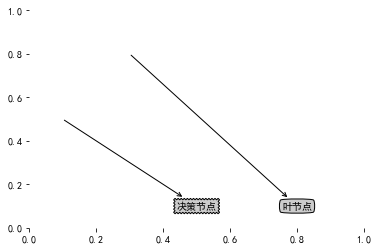

In [24]:
createPlot()

### 3.2.2 构造注解树
知道有多少叶节点，确定x轴的长度   getNumLeafs(myTree):

知道树有多少层，确定y轴的高度    getTreeDepth(myTree):

In [ ]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():                                      #测试节点的数据类型是否为字典
        if type(secondDict[key]).__name__=='dict':          #test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

## 3.3测试和储存分类器

## 3.4示例：使用决策树预测隐形眼镜的类型